# "Успешность в университете"

В рамках задания вам предлагается на основе вводных данных об абитуриентах определить, выпустится ли студент или отчислится / перейдет на другое направление.

## Библиотеки

Первым этапом анализа данных и тренировки модели является импортирование нужных библиотек. Допишите другие используемые вами бибилиотеки здесь

In [692]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

## Датасет


In [694]:
df_train = pd.read_csv('education_train.csv', index_col=0)
df_test = pd.read_csv('education_test.csv', index_col=0)

Удалим дубликаты и проверим на null

In [696]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Семейное положение                    0
Статус подачи                         0
Порядок подачи                        0
Направление поступления               0
Дневное/Вечернее обучение             0
Уровень образования                   0
Национальность                        0
Уровень образования матери            0
Уровень образования отца              0
Работа матери                         0
Работа отца                           0
Беженец                               0
Особые образовательные нужды          0
Должник                               0
Вовремя оплатил стоимость обучения    0
Пол                                   0
Наличие стипендии                     0
Возраст на момент поступления         0
Международный студент                 0
Уровень безработицы                   0
Уровень инфляции                      0
ВВП на душу населения                 0
Статус студента                       0
dtype: int64
Семейное положение                    0
Статус подачи              

In [697]:
df_train= df_train.drop_duplicates()
df_test= df_test.drop_duplicates()

In [698]:
df_train_log1 = df_train.copy()

In [699]:
df_train_log1

,Семейное положение,Статус подачи,Порядок подачи,Направление поступления,Дневное/Вечернее обучение,Уровень образования,Национальность,Уровень образования матери,Уровень образования отца,Работа матери,...,Должник,Вовремя оплатил стоимость обучения,Пол,Наличие стипендии,Возраст на момент поступления,Международный студент,Уровень безработицы,Уровень инфляции,ВВП на душу населения,Статус студента
0,1,1,1,5,1,1,1,3,26,2,...,0,0,0,0,19,0,10.8,1.4,1.74,Отчисление
1,1,12,1,4,1,1,1,9,9,10,...,0,1,1,0,24,0,12.4,0.5,1.79,Отчисление
2,1,1,6,12,1,1,1,26,13,4,...,0,1,1,0,18,0,12.4,0.5,1.79,Выпуск
3,2,12,1,17,0,11,1,25,25,10,...,0,1,0,0,47,0,7.6,2.6,0.32,Выпуск
4,1,12,1,14,1,6,1,25,25,6,...,1,1,1,0,26,0,9.4,-0.8,-3.12,Отчисление
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,1,1,1,11,1,1,1,1,1,29,...,0,1,1,0,20,0,8.9,1.4,3.51,Выпуск
2196,1,8,2,12,1,1,1,25,25,10,...,0,1,0,0,18,0,7.6,2.6,0.32,Отчисление
2197,1,1,1,2,1,1,1,3,1,5,...,0,1,0,0,18,0,12.4,0.5,1.79,Выпуск
2198,1,8,3,7,1,1,1,1,13,5,...,0,1,1,1,18,0,8.9,1.4,3.51,Отчисление


In [700]:
df_train

,Семейное положение,Статус подачи,Порядок подачи,Направление поступления,Дневное/Вечернее обучение,Уровень образования,Национальность,Уровень образования матери,Уровень образования отца,Работа матери,...,Должник,Вовремя оплатил стоимость обучения,Пол,Наличие стипендии,Возраст на момент поступления,Международный студент,Уровень безработицы,Уровень инфляции,ВВП на душу населения,Статус студента
0,1,1,1,5,1,1,1,3,26,2,...,0,0,0,0,19,0,10.8,1.4,1.74,Отчисление
1,1,12,1,4,1,1,1,9,9,10,...,0,1,1,0,24,0,12.4,0.5,1.79,Отчисление
2,1,1,6,12,1,1,1,26,13,4,...,0,1,1,0,18,0,12.4,0.5,1.79,Выпуск
3,2,12,1,17,0,11,1,25,25,10,...,0,1,0,0,47,0,7.6,2.6,0.32,Выпуск
4,1,12,1,14,1,6,1,25,25,6,...,1,1,1,0,26,0,9.4,-0.8,-3.12,Отчисление
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,1,1,1,11,1,1,1,1,1,29,...,0,1,1,0,20,0,8.9,1.4,3.51,Выпуск
2196,1,8,2,12,1,1,1,25,25,10,...,0,1,0,0,18,0,7.6,2.6,0.32,Отчисление
2197,1,1,1,2,1,1,1,3,1,5,...,0,1,0,0,18,0,12.4,0.5,1.79,Выпуск
2198,1,8,3,7,1,1,1,1,13,5,...,0,1,1,1,18,0,8.9,1.4,3.51,Отчисление


In [701]:
df_test

,Семейное положение,Статус подачи,Порядок подачи,Направление поступления,Дневное/Вечернее обучение,Уровень образования,Национальность,Уровень образования матери,Уровень образования отца,Работа матери,...,Особые образовательные нужды,Должник,Вовремя оплатил стоимость обучения,Пол,Наличие стипендии,Возраст на момент поступления,Международный студент,Уровень безработицы,Уровень инфляции,ВВП на душу населения
0,2,13,1,17,0,3,1,25,25,10,...,0,0,1,0,0,41,0,12.7,3.7,-1.70
1,1,1,1,5,1,1,1,25,25,10,...,0,0,1,1,0,19,0,9.4,-0.8,-3.12
2,1,1,1,8,1,1,1,13,25,2,...,0,0,1,1,0,22,0,12.7,3.7,-1.70
3,1,1,6,12,1,1,1,4,3,3,...,0,0,1,1,0,18,0,9.4,-0.8,-3.12
4,1,12,1,3,0,1,1,25,25,13,...,0,0,1,0,0,34,0,12.7,3.7,-1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,13,1,7,1,1,1,13,25,10,...,0,0,0,1,0,27,0,15.5,2.8,-4.06
699,1,1,3,12,1,1,1,3,13,3,...,0,0,1,1,0,18,0,9.4,-0.8,-3.12
700,1,1,1,10,1,1,1,1,3,5,...,0,0,1,0,0,18,0,10.8,1.4,1.74
701,1,1,3,15,1,1,1,1,1,5,...,0,1,1,1,1,18,0,11.1,0.6,2.02


Опишите переменные и задачу, которую вам предстоит решить:




### Описание переменных и задачи

In [704]:
for c in df_train.columns:
    print(df_train[c].value_counts(dropna=False))

Семейное положение
1    1927
2     206
4      50
5      14
3       1
Name: count, dtype: int64
Статус подачи
1     861
8     422
12    402
13    203
14    105
4      74
9      66
15     19
7      18
6      13
5       6
3       6
2       2
11      1
Name: count, dtype: int64
Порядок подачи
1    1496
2     263
3     146
4     138
5      79
6      75
0       1
Name: count, dtype: int64
Направление поступления
12    394
10    181
15    179
6     177
9     172
14    145
17    125
11    118
3     115
2     110
4     105
5      96
16     91
8      77
7      64
13     42
1       7
Name: count, dtype: int64
Дневное/Вечернее обучение
1    1958
0     240
Name: count, dtype: int64
Уровень образования
1     1826
13     127
3       94
11      88
8       26
2       15
4       10
6        5
7        3
12       3
10       1
Name: count, dtype: int64
Национальность
1     2144
14      20
3        7
9        5
12       4
10       3
16       2
4        2
7        1
5        1
8        1
15       1
6       

In [705]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2198 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Семейное положение                  2198 non-null   int64  
 1   Статус подачи                       2198 non-null   int64  
 2   Порядок подачи                      2198 non-null   int64  
 3   Направление поступления             2198 non-null   int64  
 4   Дневное/Вечернее обучение           2198 non-null   int64  
 5   Уровень образования                 2198 non-null   int64  
 6   Национальность                      2198 non-null   int64  
 7   Уровень образования матери          2198 non-null   int64  
 8   Уровень образования отца            2198 non-null   int64  
 9   Работа матери                       2198 non-null   int64  
 10  Работа отца                         2198 non-null   int64  
 11  Беженец                             2198 non-nul

**Задачей** является отпределение *статуса студента*


## Первичный анализ данных

Проведите первичный анализ данных, опишите ход вашего анализа и результаты


In [708]:
df_train['Статус студента'] = df_train['Статус студента'].replace({'Выпуск': 1, 'Отчисление': 0}).astype(int)

C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_3812\753745300.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Статус студента'] = df_train['Статус студента'].replace({'Выпуск': 1, 'Отчисление': 0}).astype(int)


### Анализ влияния признаков на статус студента

#### На основе корреляции

Рассмотрим корреляцию между каждым признаком и целевым

In [712]:
print("Семейное положение: ", df_train['Семейное положение'].corr(df_train['Статус студента']))
print("Статус подачи: ", df_train['Статус подачи'].corr(df_train['Статус студента']))
print("Порядок подачи: ", df_train['Порядок подачи'].corr(df_train['Статус студента']))
print("Направление поступления: ", df_train['Направление поступления'].corr(df_train['Статус студента']))
print("Дневное/Вечернее обучение: ", df_train['Дневное/Вечернее обучение'].corr(df_train['Статус студента']))
print("Уровень образования: ", df_train['Уровень образования'].corr(df_train['Статус студента']))
print("Национальность: ", df_train['Национальность'].corr(df_train['Статус студента']))
print("Уровень образования матери: ", df_train['Уровень образования матери'].corr(df_train['Статус студента']))
print("Уровень образования отца: ", df_train['Уровень образования отца'].corr(df_train['Статус студента']))
print("Работа матери: ", df_train['Работа матери'].corr(df_train['Статус студента']))
print("Работа отца: ", df_train['Работа отца'].corr(df_train['Статус студента']))
print("Беженец: ", df_train['Беженец'].corr(df_train['Статус студента']))
print("Особые образовательные нужды: ", df_train['Особые образовательные нужды'].corr(df_train['Статус студента']))
print("Должник: ", df_train['Должник'].corr(df_train['Статус студента']))
print("Вовремя оплатил стоимость обучения: ", df_train['Вовремя оплатил стоимость обучения'].corr(df_train['Статус студента']))
print("Пол: ", df_train['Пол'].corr(df_train['Статус студента']))
print("Наличие стипендии: ", df_train['Наличие стипендии'].corr(df_train['Статус студента']))
print("Возраст на момент поступления: ", df_train['Возраст на момент поступления'].corr(df_train['Статус студента']))
print("Международный студент: ", df_train['Международный студент'].corr(df_train['Статус студента']))
print("Уровень безработицы: ", df_train['Уровень безработицы'].corr(df_train['Статус студента']))
print("Уровень инфляции: ", df_train['Уровень инфляции'].corr(df_train['Статус студента']))
print("ВВП на душу населения: ", df_train['ВВП на душу населения'].corr(df_train['Статус студента']))

Семейное положение:  -0.09515324872442503
Статус подачи:  -0.24165150214406686
Порядок подачи:  0.10150278333936677
Направление поступления:  0.007394546868428709
Дневное/Вечернее обучение:  0.07595286137904253
Уровень образования:  -0.1018271402002686
Национальность:  -0.024742135681040413
Уровень образования матери:  -0.04716900430693107
Уровень образования отца:  -0.010008873025445508
Работа матери:  0.08610030984881155
Работа отца:  0.07339048639276032
Беженец:  0.13388883604740284
Особые образовательные нужды:  0.01886623736114791
Должник:  -0.2491517632197228
Вовремя оплатил стоимость обучения:  0.443576203297634
Пол:  -0.26426766101399557
Наличие стипендии:  0.3112625509110953
Возраст на момент поступления:  -0.25853139209283094
Международный студент:  -0.010370958134868625
Уровень безработицы:  0.009524601922004484
Уровень инфляции:  -0.03252507611534653
ВВП на душу населения:  0.050754809865319814


На основе анализа коэффициентов корреляции между различными признаками и целевым признаком **"Статус студента"** (где 0 — студент отчислен, 1 — студент выпустился), можно выделить влияние различных факторов на вероятность успешного завершения обучения.

##### Наиболее значимые факторы:
- **Вовремя оплатил стоимость обучения (0.444):**  
  Это самый значимый положительный фактор. Своевременная оплата обучения значительно повышает вероятность успешного выпуска.
- **Наличие стипендии (0.312):**  
  Финансовая поддержка в виде стипендии существенно связана с успешным окончанием обучения.
- **Пол (-0.264):**  
  Отрицательная корреляция указывает, что мужчины чаще сталкиваются с трудностями в обучении по сравнению с женщинами.
- **Возраст на момент поступления (-0.259):**  
  Чем старше студент при поступлении, тем выше вероятность отчисления.
- **Должник (-0.249):**  
  Наличие задолженностей существенно повышает вероятность отчисления.

##### Факторы с умеренным влиянием:
- **Статус подачи (-0.242):**  
  Негативное влияние говорит о том, что поздняя подача документов связана с большей вероятностью отчисления.
- **Семейное положение (-0.095):**  
  Студенты из семейных пар немного чаще сталкиваются с трудностями в обучении.
- **Работа матери (0.086) и отца (0.073):**  
  Положительная корреляция может свидетельствовать о том, что занятость родителей оказывает небольшой положительный эффект.
- **Беженец (0.134):**  
  Статус беженца слегка повышает вероятность выпуска, возможно, благодаря дополнительной поддержке.

##### Факторы со слабым влиянием:
- **Дневное/Вечернее обучение (0.076):**  
  Студенты дневной формы немного успешнее.
- **Национальность (-0.025):**  
  Национальность практически не влияет на статус студента.
- **Уровень образования родителей:**  
  - Мать: -0.047  
  - Отец: -0.010  
  Эти признаки оказывают минимальное влияние на успех в обучении.
- **Особые образовательные нужды (0.019):**  
  Незначительное влияние.
- **Международный студент (-0.010):**  
  Статус международного студента практически не связан с успешностью.
- **Направление поступления (0.008):**  
  Незначительная положительная корреляция.

##### Макроэкономические показатели:
- **Уровень инфляции (-0.034) и уровень безработицы (0.009):**  
  Практически не оказывают влияния на статус студента.
- **ВВП на душу населения (0.050):**  
  Слабая положительная связь, что может указывать на незначительное влияние экономической ситуации на успешность студентов.

##### Общие выводы:
Финансовые аспекты, такие как своевременная оплата обучения и наличие стипендии, оказывают наибольшее влияние на успешное завершение обучения. Социальные и демографические факторы (пол, возраст, статус подачи) также играют значимую роль, но их влияние менее выражено. Макроэкономические показатели и образование родителей оказывают минимальное влияние.

#### На основе графиков

Проверим категориальные признаки

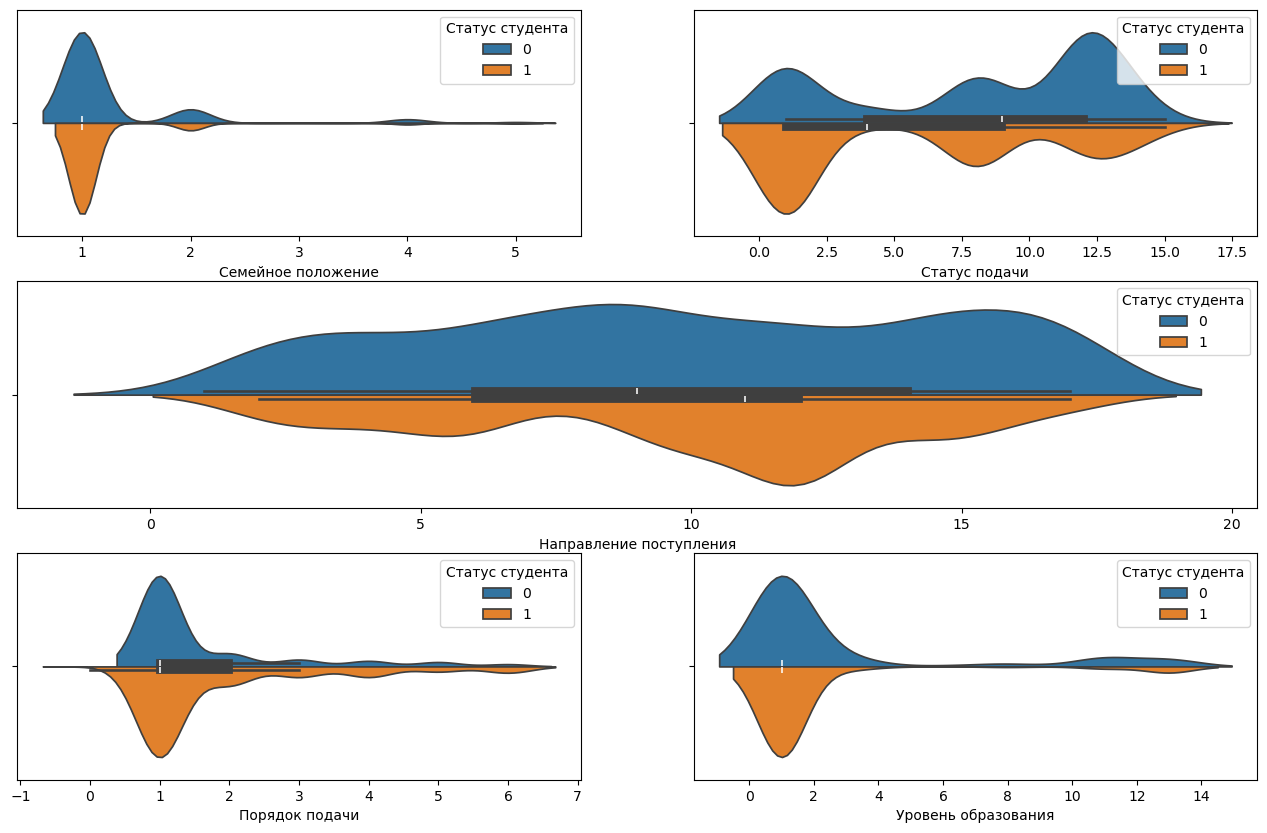

In [716]:
fig = plt.figure(figsize = (16,10))
g = fig.add_gridspec (3,2)
ax1 = fig.add_subplot(g[:1, :1])
sns.violinplot(x = "Семейное положение", hue = 'Статус студента', split = True, data=df_train)
ax2 = fig.add_subplot(g[:1, 1:]) 
sns.violinplot(x="Статус подачи",hue = 'Статус студента', split = True, data=df_train)
ax3 = fig.add_subplot(g[1:2, 0:]) 
sns.violinplot(x="Направление поступления",hue = 'Статус студента', split = True, data=df_train)
ax4 = fig.add_subplot(g[2:, :1]) 
sns.violinplot(x="Порядок подачи",hue = 'Статус студента', split = True, data=df_train)
ax5 = fig.add_subplot(g[2:, 1:]) 
sns.violinplot(x="Уровень образования",hue = 'Статус студента', split = True, data=df_train)

plt.show()

##### Часть 1
На основе пяти графиков есть зависимость таких категорий как *Напрвлением поступления* и *Статусом подачи*

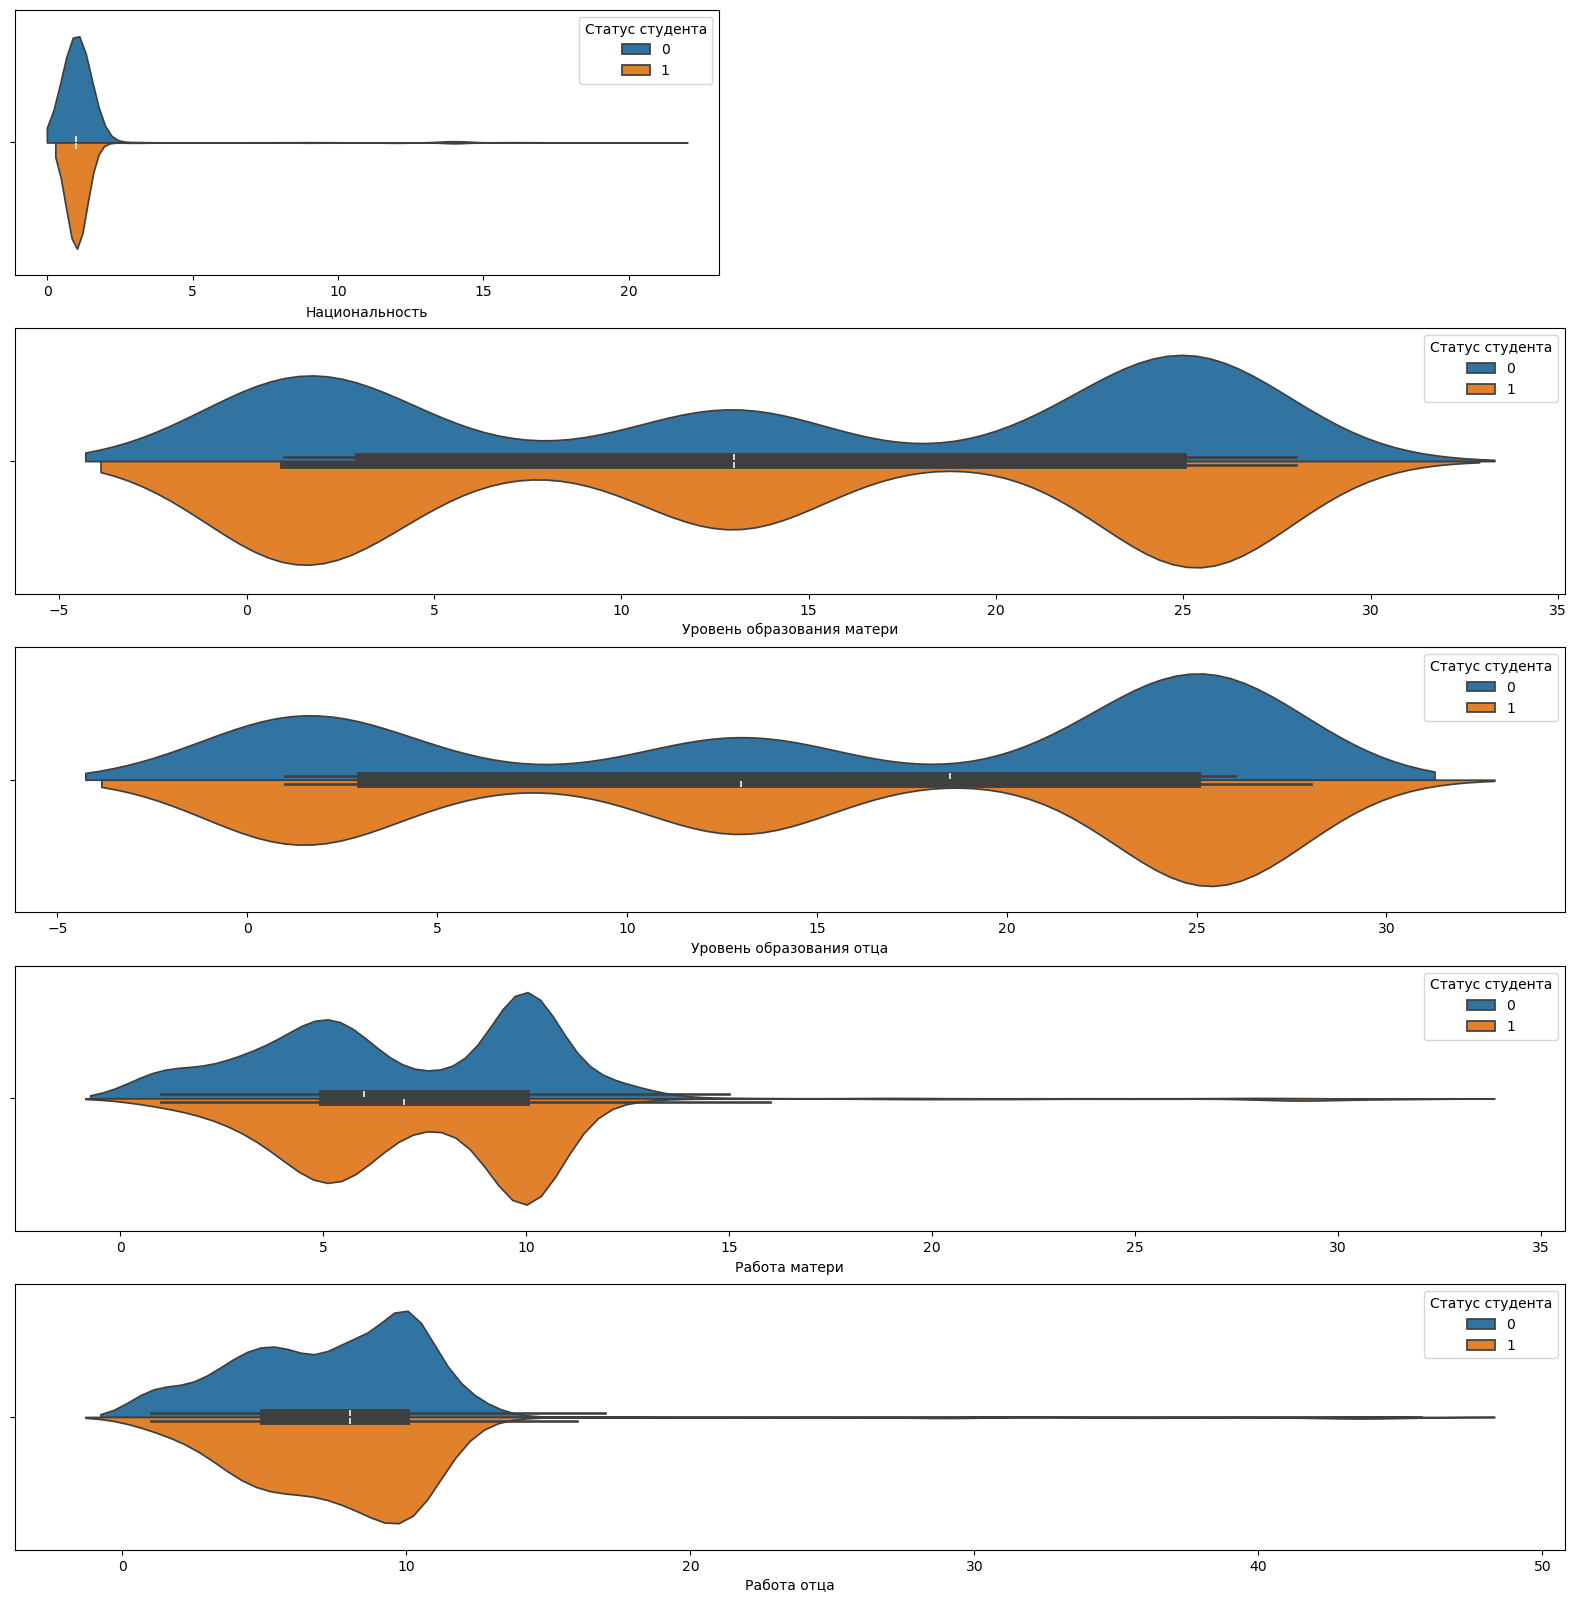

In [718]:
fig = plt.figure(figsize = (20,20))
g = fig.add_gridspec(5,2)
ax1 = fig.add_subplot(g[:1, :1])
sns.violinplot(x = "Национальность", hue = 'Статус студента', split = True, data=df_train)
ax2 = fig.add_subplot(g[1:2, 0:]) 
sns.violinplot(x="Уровень образования матери",hue = 'Статус студента', split = True, data=df_train)
ax3 = fig.add_subplot(g[2:3, 0:]) 
sns.violinplot(x="Уровень образования отца",hue = 'Статус студента', split = True, data=df_train)
ax4 = fig.add_subplot(g[3:4, 0:]) 
sns.violinplot(x="Работа матери",hue = 'Статус студента', split = True, data=df_train)
ax5 = fig.add_subplot(g[4:5, 0:]) 
sns.violinplot(x="Работа отца",hue = 'Статус студента', split = True, data=df_train)

plt.show()

##### Часть 2
На основе пяти графиков нет зависимостей

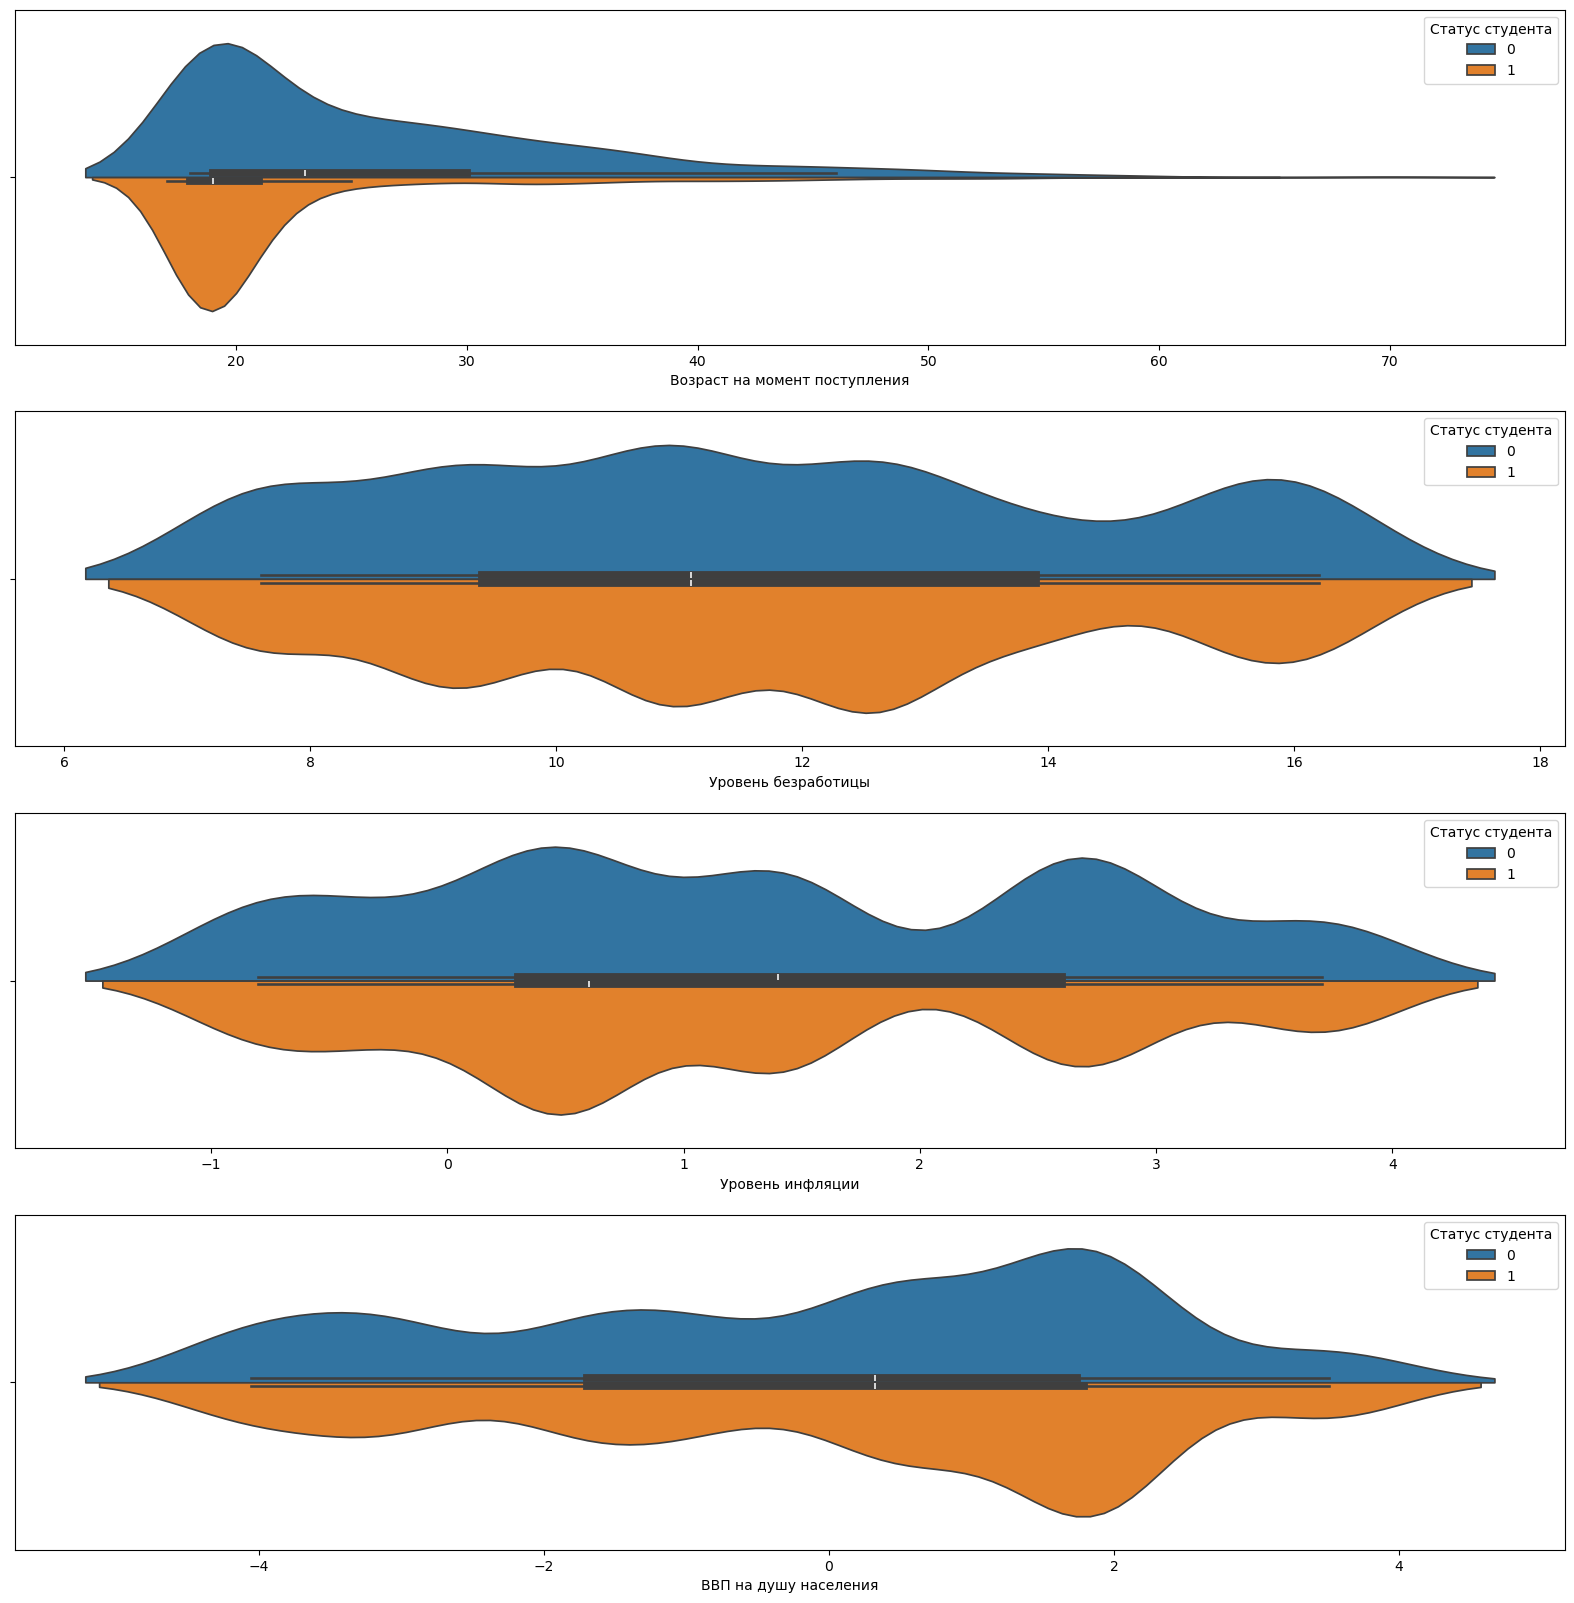

In [720]:
fig = plt.figure(figsize = (20,20))
g = fig.add_gridspec(4,2)
ax1 = fig.add_subplot(g[0:1, 0:])
sns.violinplot(x = "Возраст на момент поступления", hue = 'Статус студента', split = True, data=df_train)
ax2 = fig.add_subplot(g[1:2, 0:]) 
sns.violinplot(x="Уровень безработицы",hue = 'Статус студента', split = True, data=df_train)
ax3 = fig.add_subplot(g[2:3, 0:]) 
sns.violinplot(x="Уровень инфляции",hue = 'Статус студента', split = True, data=df_train)
ax4 = fig.add_subplot(g[3:4, 0:]) 
sns.violinplot(x="ВВП на душу населения",hue = 'Статус студента', split = True, data=df_train)

plt.show()

##### Часть 3
На основе пяти графиков есть зависимость таких категорий как *Возраст поступления*

По результатам анализа графика наиболее значимыми категориальными признаками, влияющими на целевой признак **"Статус студента"** (0 — отчислен, 1 — выпустился), являются:

##### 1. **Направление поступления**  
- По графику видно, что с некоторых программ выпускаются больше/ меньше

##### 2. **Статус подачи**    
- Выпускаются больше с первых 3 видов подачи документов, а отчисляются с последних видов.  

##### 3. **Возраст на момент поступления**  
- Чем старше, тем больше отчисляются

##### Общие выводы:
Последние 2 признака являются важными из корреляции, значит добавим еще *направление подготовки*

### Итого

Для итогового набора признаков возьмем наиболее значимые факторы с корреляционного анализа, факторы с умеренным влиянием проанализировав по графикам убираем работу родителей и семейное положение, а из анализа графиков берем еще направление обучения

In [725]:
features = ['Вовремя оплатил стоимость обучения', 'Наличие стипендии', 'Пол', 
            'Возраст на момент поступления', 'Должник', 'Статус подачи', 
            'Беженец', 'Направление поступления' ]

In [726]:
print(df_train['Направление поступления'].unique())
print(df_train['Направление поступления'].min())
print(df_train['Направление поступления'].max())

[ 5  4 12 17 14  8  6  9 16  3 11 15  7 10  2 13  1]
1
17


In [727]:
df_train_f = df_train.copy()
df_train_f['НП_group'] = pd.cut(df_train_f['Направление поступления'], bins=[0, 4, 10, 18], labels=['first', 'second', 'third'])
df_train_f.head()

,Семейное положение,Статус подачи,Порядок подачи,Направление поступления,Дневное/Вечернее обучение,Уровень образования,Национальность,Уровень образования матери,Уровень образования отца,Работа матери,...,Вовремя оплатил стоимость обучения,Пол,Наличие стипендии,Возраст на момент поступления,Международный студент,Уровень безработицы,Уровень инфляции,ВВП на душу населения,Статус студента,НП_group
0,1,1,1,5,1,1,1,3,26,2,...,0,0,0,19,0,10.8,1.4,1.74,0,second
1,1,12,1,4,1,1,1,9,9,10,...,1,1,0,24,0,12.4,0.5,1.79,0,first
2,1,1,6,12,1,1,1,26,13,4,...,1,1,0,18,0,12.4,0.5,1.79,1,third
3,2,12,1,17,0,11,1,25,25,10,...,1,0,0,47,0,7.6,2.6,0.32,1,third
4,1,12,1,14,1,6,1,25,25,6,...,1,1,0,26,0,9.4,-0.8,-3.12,0,third


In [728]:
df_train_f['НП_group'] = df_train_f['НП_group'].replace({'first': 1, 'second': 2, 'third': 3}).astype(int)

C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_3812\4017144350.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train_f['НП_group'] = df_train_f['НП_group'].replace({'first': 1, 'second': 2, 'third': 3}).astype(int)
C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_3812\4017144350.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_train_f['НП_group'] = df_train_f['НП_group'].replace({'first': 1, 'second': 2, 'third': 3}).astype(int)


In [729]:
df_train_f

,Семейное положение,Статус подачи,Порядок подачи,Направление поступления,Дневное/Вечернее обучение,Уровень образования,Национальность,Уровень образования матери,Уровень образования отца,Работа матери,...,Вовремя оплатил стоимость обучения,Пол,Наличие стипендии,Возраст на момент поступления,Международный студент,Уровень безработицы,Уровень инфляции,ВВП на душу населения,Статус студента,НП_group
0,1,1,1,5,1,1,1,3,26,2,...,0,0,0,19,0,10.8,1.4,1.74,0,2
1,1,12,1,4,1,1,1,9,9,10,...,1,1,0,24,0,12.4,0.5,1.79,0,1
2,1,1,6,12,1,1,1,26,13,4,...,1,1,0,18,0,12.4,0.5,1.79,1,3
3,2,12,1,17,0,11,1,25,25,10,...,1,0,0,47,0,7.6,2.6,0.32,1,3
4,1,12,1,14,1,6,1,25,25,6,...,1,1,0,26,0,9.4,-0.8,-3.12,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,1,1,1,11,1,1,1,1,1,29,...,1,1,0,20,0,8.9,1.4,3.51,1,3
2196,1,8,2,12,1,1,1,25,25,10,...,1,0,0,18,0,7.6,2.6,0.32,0,3
2197,1,1,1,2,1,1,1,3,1,5,...,1,0,0,18,0,12.4,0.5,1.79,1,1
2198,1,8,3,7,1,1,1,1,13,5,...,1,1,1,18,0,8.9,1.4,3.51,0,2


In [730]:
features1 = ['Вовремя оплатил стоимость обучения', 'Наличие стипендии', 'Пол', 
            'Возраст на момент поступления', 'Должник', 'Статус подачи', 
            'Беженец', 'НП_group' ]

## Обучение модели

Разделяем выбрку на обучающую и тестовую.

In [733]:
X = df_train_log1.drop(["Статус студента"], axis = 1)
y = df_train_log1["Статус студента"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Используем **логистическую регрессию** в качества модели для классификации.

In [735]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
# Предскажем значение целевой переменной
y_pred = clf.predict(X_test)

C:\Users\ElenaKosteva\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


В качестве метрики оценки оценивания качества модели можно использовать **F1 score (macro)**, так как он будет использоваться в оценке решений.

In [737]:
fscore = f1_score(y_test, y_pred, average='macro')
print(f'F1 мера (макро): {fscore}')

F1 мера (макро): 0.7460101867572156


Реализуйте ваши модели машинного обучения, попробуйте разные комбинации признаков и посмотрите, что улучшит результаты

Используем **логистическую регрессию** в качества модели для нового набора признаков.

In [740]:
X_train1 = X_train[features]
X_test1 = X_test[features]

In [741]:
clf1 = LogisticRegression(random_state=42)
clf1.fit(X_train1, y_train)
# Предскажем значение целевой переменной
y_pred1 = clf1.predict(X_test1)

In [742]:
fscore1 = f1_score(y_test, y_pred1, average='macro')
print(f'F1 мера (макро): {fscore1}')

F1 мера (макро): 0.7289767686300217


Используем **градиентный бустинг** в качества модели для нового набора признаков.

In [744]:
X_train2 = X_train[features]
X_test2 = X_test[features]

In [745]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)
gb_classifier.fit(X_train2, y_train)
y_pred2 = gb_classifier.predict(X_test2)

In [746]:
fscore2 = f1_score(y_test, y_pred2, average='macro')
print(f'F1 мера (макро): {fscore2}')

F1 мера (макро): 0.7523327055054014


Используем **градиентный бустинг** в качества модели для нового набора признаков(features1).

In [748]:
X = df_train_f.drop(["Статус студента"], axis = 1)
y = df_train_log1["Статус студента"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [749]:
X_train3 = X_train[features1]
X_test3 = X_test[features1]

In [750]:
gb_classifier1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)
gb_classifier1.fit(X_train3, y_train)
y_pred3 = gb_classifier1.predict(X_test3)

In [751]:
fscore3 = f1_score(y_test, y_pred3, average='macro')
print(f'F1 мера (макро): {fscore3}')

F1 мера (макро): 0.7257266423579124


#### Итого:
- F1_1 мера (макро): 0.7289767686300217 
- F1_2 мера (макро): 0.7523327055054014 
- F1_3 мера (макро): 0.7257266423579124

## Генерация ответа

Для отправки результатов работы вашей модели нужно применить модель к тестовой выборке, предоставленной отдельно, и прикрепить в ответ получившуюся таблицу.

Опишите какая модель и признаки были использованы для каждой попытки. Это могут быть различные модели бинарной классификации либо различные комбинации признаков для одной модели и т.д.

### Модель 1

В данной попытке были использованы наиболее важные признаки и логистическая регрессия

In [757]:
df_test_1 = df_test.copy()[features]
df_test_1['Статус студента'] = clf1.predict(df_test_1)

In [758]:
df_test_1

,Вовремя оплатил стоимость обучения,Наличие стипендии,Пол,Возраст на момент поступления,Должник,Статус подачи,Беженец,Направление поступления,Статус студента
0,1,0,0,41,0,13,0,17,Отчисление
1,1,0,1,19,0,1,1,5,Выпуск
2,1,0,1,22,0,1,1,8,Выпуск
3,1,0,1,18,0,1,1,12,Выпуск
4,1,0,0,34,0,12,0,3,Выпуск
...,...,...,...,...,...,...,...,...,...
698,0,0,1,27,0,13,0,7,Отчисление
699,1,0,1,18,0,1,1,12,Выпуск
700,1,0,0,18,0,1,0,10,Выпуск
701,1,1,1,18,1,1,1,15,Выпуск


In [759]:
df_test_1.sort_index().to_csv("submit1_kostevaes.csv")

### Модель 2

В данной попытке были использованы наиболее важные признаки и градиентный бустинг

In [762]:
df_test_2 = df_test.copy()[features]
df_test_2['Статус студента'] = gb_classifier.predict(df_test_2)

In [763]:
df_test_2

,Вовремя оплатил стоимость обучения,Наличие стипендии,Пол,Возраст на момент поступления,Должник,Статус подачи,Беженец,Направление поступления,Статус студента
0,1,0,0,41,0,13,0,17,Выпуск
1,1,0,1,19,0,1,1,5,Выпуск
2,1,0,1,22,0,1,1,8,Отчисление
3,1,0,1,18,0,1,1,12,Выпуск
4,1,0,0,34,0,12,0,3,Выпуск
...,...,...,...,...,...,...,...,...,...
698,0,0,1,27,0,13,0,7,Отчисление
699,1,0,1,18,0,1,1,12,Выпуск
700,1,0,0,18,0,1,0,10,Выпуск
701,1,1,1,18,1,1,1,15,Выпуск


In [764]:
df_test_2.sort_index().to_csv("submit2_kostevaes.csv")

### Модель 3

In [766]:
df_test_f = df_test.copy()
df_test_f['НП_group'] = pd.cut(df_test_f['Направление поступления'], bins=[0, 4, 10, 18], labels=['first', 'second', 'third'])
df_test_f.head()

,Семейное положение,Статус подачи,Порядок подачи,Направление поступления,Дневное/Вечернее обучение,Уровень образования,Национальность,Уровень образования матери,Уровень образования отца,Работа матери,...,Должник,Вовремя оплатил стоимость обучения,Пол,Наличие стипендии,Возраст на момент поступления,Международный студент,Уровень безработицы,Уровень инфляции,ВВП на душу населения,НП_group
0,2,13,1,17,0,3,1,25,25,10,...,0,1,0,0,41,0,12.7,3.7,-1.70,third
1,1,1,1,5,1,1,1,25,25,10,...,0,1,1,0,19,0,9.4,-0.8,-3.12,second
2,1,1,1,8,1,1,1,13,25,2,...,0,1,1,0,22,0,12.7,3.7,-1.70,second
3,1,1,6,12,1,1,1,4,3,3,...,0,1,1,0,18,0,9.4,-0.8,-3.12,third
4,1,12,1,3,0,1,1,25,25,13,...,0,1,0,0,34,0,12.7,3.7,-1.70,first


In [767]:
df_test_f['НП_group'] = df_test_f['НП_group'].replace({'first': 1, 'second': 2, 'third': 3}).astype(int)
df_test_f.head()

C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_3812\3825102831.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test_f['НП_group'] = df_test_f['НП_group'].replace({'first': 1, 'second': 2, 'third': 3}).astype(int)
C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_3812\3825102831.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_test_f['НП_group'] = df_test_f['НП_group'].replace({'first': 1, 'second': 2, 'third': 3}).astype(int)


,Семейное положение,Статус подачи,Порядок подачи,Направление поступления,Дневное/Вечернее обучение,Уровень образования,Национальность,Уровень образования матери,Уровень образования отца,Работа матери,...,Должник,Вовремя оплатил стоимость обучения,Пол,Наличие стипендии,Возраст на момент поступления,Международный студент,Уровень безработицы,Уровень инфляции,ВВП на душу населения,НП_group
0,2,13,1,17,0,3,1,25,25,10,...,0,1,0,0,41,0,12.7,3.7,-1.70,3
1,1,1,1,5,1,1,1,25,25,10,...,0,1,1,0,19,0,9.4,-0.8,-3.12,2
2,1,1,1,8,1,1,1,13,25,2,...,0,1,1,0,22,0,12.7,3.7,-1.70,2
3,1,1,6,12,1,1,1,4,3,3,...,0,1,1,0,18,0,9.4,-0.8,-3.12,3
4,1,12,1,3,0,1,1,25,25,13,...,0,1,0,0,34,0,12.7,3.7,-1.70,1


In [768]:
df_test_3 = df_test_f.copy()[features]
df_test_3['Статус студента'] = gb_classifier.predict(df_test_3)

In [769]:
df_test_3

,Вовремя оплатил стоимость обучения,Наличие стипендии,Пол,Возраст на момент поступления,Должник,Статус подачи,Беженец,Направление поступления,Статус студента
0,1,0,0,41,0,13,0,17,Выпуск
1,1,0,1,19,0,1,1,5,Выпуск
2,1,0,1,22,0,1,1,8,Отчисление
3,1,0,1,18,0,1,1,12,Выпуск
4,1,0,0,34,0,12,0,3,Выпуск
...,...,...,...,...,...,...,...,...,...
698,0,0,1,27,0,13,0,7,Отчисление
699,1,0,1,18,0,1,1,12,Выпуск
700,1,0,0,18,0,1,0,10,Выпуск
701,1,1,1,18,1,1,1,15,Выпуск


In [770]:
df_test_3.sort_index().to_csv("submit3_kostevaes.csv")

Контрольная считается засчитанной, если результаты любой из попыток получились лучше, чем у логистической регрессии без предварительной обработки данных.

## Выводы

В задаче нам важен F1 score.

1. **Модель логистической регрессии** с набором features:
- F1-score: 0.7289767686300217 
  
2. **Модель Gradient Boosting** с набором features:
- F1-score: - 0.7523327055054014 
  
2. **Модель Gradient Boosting** с набором features1:
- F1-score: 0.7257266423579124

**Итого:** лучше была 2ая попытка **Модель Gradient Boosting** с набором features.